# No G and Patch-seq HEK-GT Analysis

Jupyter notebook containing analyses for looking at number of rabies barcodes per cell and how that translates to collision in slice culture for Shin & Urbanek. Analyses correspond to !!!!!!

In [ ]:
The notebook contains analysis for quantifying...

Input for this notebook requires:
1) Viral diversity libraries, which at a minimum, must contain a column with the unique barcode sequence ('barcode') and the number of UMIs counted per barcode.

Output for this notebook includes:
1) Plots for each of analyses described above

In [ ]:
Module and their versions used when generating figures for the paper can be found in 'requirements.txt', which is stored in our GitHub repository: !!!!!!

In [ ]:
This code was last amended by Maddie Urbanek on !!!!!

## Notebook set-up

In [1]:
#Load in modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from itertools import product
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

In [4]:
#Set working directory to point to barcode diversity libraries
import os
os.chdir('/Users/maddieurbanek/Desktop/revision_data/resubmission/data/')

## Import datasets

No G slices

In [31]:
#Import no G barcodes
bc_1=pd.read_table('./fastqs/slice_experiments/no_g/no_g_1/bc/completecounts.tsv',delimiter='\t')
bc_2=pd.read_table('./fastqs/slice_experiments/no_g/no_g_2/bc/completecounts.tsv',delimiter='\t')

In [7]:
#Import no G real cells
nog_1=pd.read_table('./transcriptome/cellbarcode_lists/nog1.csv',delimiter=',')
nog_2=pd.read_table('./transcriptome/cellbarcode_lists/nog2.csv',delimiter=',')

HEK-GT Patch-seq samples

In [55]:
#Import barcode counts matrix from Patch-seqed HEK cells
hek_1=pd.read_table('./fastqs/hekgt/hek_1/completecounts.tsv',delimiter='\t')
hek_2=pd.read_table('./fastqs/hekgt/hek_2/completecounts.tsv',delimiter='\t')
hek_3=pd.read_table('./fastqs/hekgt/hek_3/completecounts.tsv',delimiter='\t')
hek_4=pd.read_table('./fastqs/hekgt/hek_4/completecounts.tsv',delimiter='\t')
hek_5=pd.read_table('./fastqs/hekgt/hek_5/completecounts.tsv',delimiter='\t')
hek_6=pd.read_table('./fastqs/hekgt/hek_6/completecounts.tsv',delimiter='\t')
hek_7=pd.read_table('./fastqs/hekgt/hek_7/completecounts.tsv',delimiter='\t')
hek_8=pd.read_table('./fastqs/hekgt/hek_8/completecounts.tsv',delimiter='\t')
hek_9=pd.read_table('./fastqs/hekgt/hek_9/completecounts.tsv',delimiter='\t')
hek_10=pd.read_table('./fastqs/hekgt/hek_10/completecounts.tsv',delimiter='\t')
hek_11=pd.read_table('./fastqs/hekgt/hek_11/completecounts.tsv',delimiter='\t')
hek_12=pd.read_table('./fastqs/hekgt/hek_12/completecounts.tsv',delimiter='\t')
hek_13=pd.read_table('./fastqs/hekgt/hek_13/completecounts.tsv',delimiter='\t')
hek_14=pd.read_table('./fastqs/hekgt/hek_14/completecounts.tsv',delimiter='\t')
hek_15=pd.read_table('./fastqs/hekgt/hek_15/completecounts.tsv',delimiter='\t')
hek_16=pd.read_table('./fastqs/hekgt/hek_16/completecounts.tsv',delimiter='\t')

Barcode collision simulations

In [19]:
collision=pd.read_table('./barcode_diversity_libraries/intermediate_files/barcode_collision/barcode_collision.csv',delimiter=',')

## Compare no G collision to barcode collision simulations

Subset no G barcode matrix down to real cells

In [ ]:
percentcells = int_list / sampling * 100
int_list = pd.concat([int_list, percentcells], axis=1, ignore_index=True)
int_list.columns=['collisioncells','percentcells']

In [32]:
bc_1['CBC'] = bc_1['CBC'].str.replace("'", "")
bc_1['CBC'] = bc_1['CBC'].str.replace('b', 'nog1_')

bc_2['CBC'] = bc_2['CBC'].str.replace("'", "")
bc_2['CBC'] = bc_2['CBC'].str.replace('b', 'nog2_')

real_bc_1 = bc_1.loc[bc_1['CBC'].isin(nog_1['x'])]
real_bc_2 = bc_2.loc[bc_2['CBC'].isin(nog_2['x'])]

print("Number of real cells in dataset 1:")
print(real_bc_1['CBC'].nunique())

print()
print("Number of real cells in dataset 2:")
print(real_bc_2['CBC'].nunique())   

Number of real cells in dataset 1:
625

Number of real cells in dataset 2:
2929


Calculate barcode collision observed in cells with UMI thresholding like a normal experiment

In [42]:
#For dataset 1:
real_bc_1.drop(real_bc_1[real_bc_1['UMI_Count'] < 2].index, inplace=True)
print("Dataset 1:")
print("Total number of infection events:")
print(len(real_bc_1))
print("Unique barcodes in dataset:")
print(real_bc_1['barcode'].nunique())
print("Calculated % barcodes colliding:")
print((real_bc_1.duplicated(subset=['barcode'],keep='first').sum())/len(real_bc_1)*100)
print()

#For dataset 2:
real_bc_2.drop(real_bc_2[real_bc_2['UMI_Count'] < 2].index, inplace=True)
print("Dataset 2:")
print("Total number of infection events:")
print(len(real_bc_2))
print("Unique barcodes in dataset:")
print(real_bc_2['barcode'].nunique())
print("Calculated % barcodes colliding:")
print((real_bc_2.duplicated(subset=['barcode'],keep='first').sum())/len(real_bc_2)*100)


Dataset 1:
Total number of infection events:
2183
Unique barcodes in dataset:
1137
Calculated % barcodes colliding:
47.915712322491984

Dataset 2:
Total number of infection events:
9835
Unique barcodes in dataset:
7100
Calculated % barcodes colliding:
27.80884595831215


/var/folders/5l/rz29hct17d916rns_lvv75dw0000gn/T/ipykernel_18369/2817434057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_bc_1.drop(real_bc_1[real_bc_1['UMI_Count'] < 2].index, inplace=True)
/var/folders/5l/rz29hct17d916rns_lvv75dw0000gn/T/ipykernel_18369/2817434057.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_bc_2.drop(real_bc_2[real_bc_2['UMI_Count'] < 2].index, inplace=True)


Visualization

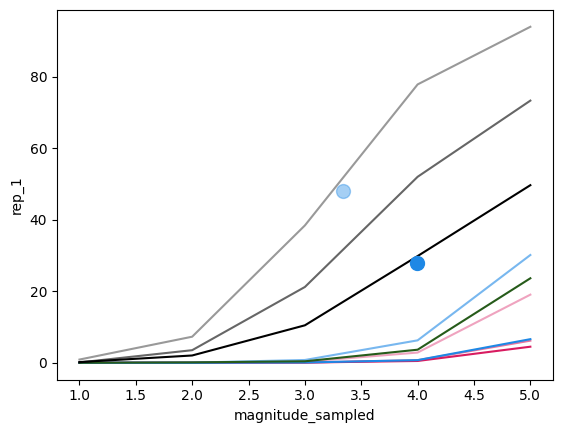

In [51]:
#Plot barcode collision
sns.lineplot(data=collision, x="magnitude_sampled", y="rep_1", errorbar='sd', color='#d81b60',linewidth = 1.5)
sns.lineplot(data=collision, x="magnitude_sampled", y="rep_2", errorbar='sd', color='#d81b60',linewidth = 1.5,alpha=0.6)
sns.lineplot(data=collision, x="magnitude_sampled", y="rep_3", errorbar='sd', color='#d81b60',linewidth = 1.5,alpha=0.4)
sns.lineplot(data=collision, x="magnitude_sampled", y="rep_4", errorbar='sd', color='#1E88E5',linewidth = 1.5)
sns.lineplot(data=collision, x="magnitude_sampled", y="rep_5", errorbar='sd', color='#1E88E5',linewidth = 1.5,alpha=0.6)
sns.lineplot(data=collision, x="magnitude_sampled", y="randomer", errorbar='sd', color='#265B1A',linewidth = 1.5)
sns.lineplot(data=collision, x="magnitude_sampled", y="zhang", errorbar='sd', color='black',linewidth = 1.5)
sns.lineplot(data=collision, x="magnitude_sampled", y="saunders", errorbar='sd', color='black',linewidth = 1.5,alpha=0.6)
sns.lineplot(data=collision, x="magnitude_sampled", y="clark", errorbar='sd', color='black',linewidth = 1.5,alpha=0.4)

plt.plot(np.log10(2183), (47.915712322491984),marker='.',color='#1E88E5',alpha=0.4,ms=20)
plt.plot(np.log10(9835), (27.80884595831215),marker='.',color='#1E88E5',ms=20)

plt.savefig("../figs/sfig_1/no_g.pdf")

plt.show()

### Look at total number of unique barcodes and their count distributions in HEK-GT cells

Make function for plotting %UMI and rank for barcodes in HEK cells

In [69]:
def percent_umi(dataset #the properly formatted dataframe above including barcodes and UMI counts
               ):
    
    dataset['%UMI']=(dataset['UMI_Count']/(dataset['UMI_Count'].sum()))*100
    dataset_s=dataset.sort_values(by='%UMI',ascending=False)
    dataset=dataset_s.reset_index()
    dataset['rank']=dataset.index
    dataset['rank']=dataset['rank']+1

    return dataset

In [70]:
hek_1=percent_umi(hek_1)
hek_2=percent_umi(hek_2)
hek_3=percent_umi(hek_3)
hek_4=percent_umi(hek_4)
hek_5=percent_umi(hek_5)
hek_6=percent_umi(hek_6)
hek_7=percent_umi(hek_7)
hek_8=percent_umi(hek_8)
hek_9=percent_umi(hek_9)
hek_10=percent_umi(hek_10)
hek_11=percent_umi(hek_11)
hek_12=percent_umi(hek_12)
hek_13=percent_umi(hek_13)
hek_14=percent_umi(hek_14)
hek_15=percent_umi(hek_15)
hek_16=percent_umi(hek_16)

In [58]:
#Print hex codes for color scheme
from pylab import *

cmap = cm.get_cmap('tab20b', 16)    # PiYG

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#393b79
#5254a3
#6b6ecf
#637939
#8ca252
#b5cf6b
#8c6d31
#bd9e39
#e7ba52
#843c39
#ad494a
#d6616b
#7b4173
#a55194
#ce6dbd
#de9ed6


/var/folders/5l/rz29hct17d916rns_lvv75dw0000gn/T/ipykernel_18369/203012320.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20b', 16)    # PiYG


In [68]:
hek_2

,index,CBC,barcode,UMI_Count,%UMI,rank
0,262,b'AAAAAAAAAAAA',AATTCGTATCAACTGCGACCG-GATCCAATTTCCCTGCAGGG-CTA...,63765,59.979682,0
1,54,b'AAAAAAAAAAAA',AATTCAGTCCGGCTCAGCGGG-GATCTCGACAACACGTGGTG-CTA...,20889,19.648954,1
2,187,b'AAAAAAAAAAAA',AATTCCTGCGTCCCCGACCAG-GATCTGGCCCGCATGTATGG-CTA...,9629,9.057388,2
3,60,b'AAAAAAAAAAAA',AATTCAGTTACCGGCAGTACG-GATCGGCGTCTGTACTTGAG-CTA...,6503,6.116959,3
4,137,b'AAAAAAAAAAAA',AATTCCGCAGCCTTTAGATCG-GATCCCAGTACGACCCCAAG-CTA...,3444,3.239552,4
...,...,...,...,...,...,...
363,102,b'AAAAAAAAAAAA',AATTCCCATGAAGGGTCAAGG-GATCAATGGTGTGGGTTGGG-CTA...,1,0.000941,363
364,101,b'AAAAAAAAAAAA',AATTCCCAGCGCTGAGACCTG-GATCGGAACAGTTAGGGGTG-CTA...,1,0.000941,364
365,247,b'AAAAAAAAAAAA',AATTCGGGAGCGTGCATACAG-GATCTAAAGGATGCACGCGG-CTA...,1,0.000941,365
366,248,b'AAAAAAAAAAAA',AATTCGGGATGGTCGGCTTGG-GATCGACAGCGCCGGCTTAG-CTA...,1,0.000941,366


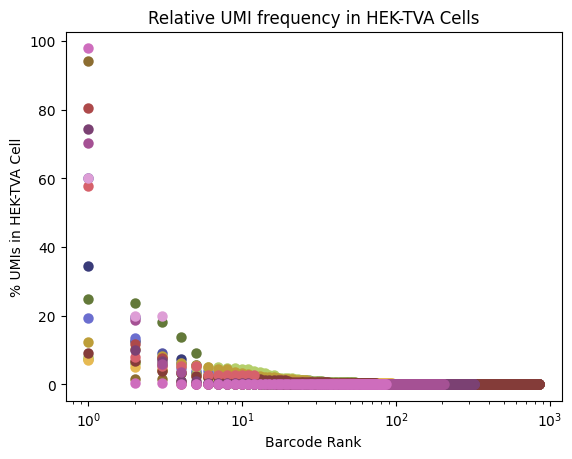

In [71]:
plt.scatter(hek_1['rank'],hek_1['%UMI'],linewidth=1.5,color='#393b79')
plt.scatter(hek_2['rank'],hek_2['%UMI'],linewidth=1.5,color='#5254a3')
plt.scatter(hek_3['rank'],hek_3['%UMI'],linewidth=1.5,color='#6b6ecf')
plt.scatter(hek_4['rank'],hek_4['%UMI'],linewidth=1.5,color='#637939')
plt.scatter(hek_5['rank'],hek_5['%UMI'],linewidth=1.5,color='#8ca252')
plt.scatter(hek_6['rank'],hek_6['%UMI'],linewidth=1.5,color='#b5cf6b')
plt.scatter(hek_7['rank'],hek_7['%UMI'],linewidth=1.5,color='#8c6d31')
plt.scatter(hek_8['rank'],hek_8['%UMI'],linewidth=1.5,color='#bd9e39')
plt.scatter(hek_9['rank'],hek_9['%UMI'],linewidth=1.5,color='#e7ba52')
plt.scatter(hek_10['rank'],hek_10['%UMI'],linewidth=1.5,color='#843c39')
plt.scatter(hek_11['rank'],hek_11['%UMI'],linewidth=1.5,color='#ad494a')
plt.scatter(hek_12['rank'],hek_12['%UMI'],linewidth=1.5,color='#d6616b')
plt.scatter(hek_13['rank'],hek_13['%UMI'],linewidth=1.5,color='#7b4173')
plt.scatter(hek_14['rank'],hek_14['%UMI'],linewidth=1.5,color='#a55194')
plt.scatter(hek_15['rank'],hek_15['%UMI'],linewidth=1.5,color='#ce6dbd')
plt.scatter(hek_16['rank'],hek_16['%UMI'],linewidth=1.5,color='#de9ed6')

#plt.axis([0, 25, 0, 1.1])
plt.xlabel('Barcode Rank')
plt.ylabel('% UMIs in HEK-TVA Cell')
plt.xscale('log')
#plt.yscale('log')
plt.title('Relative UMI frequency in HEK-TVA Cells')

plt.savefig('../figs/sfig_1/hek_no_zoom.pdf')
plt.show()